In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os
from PIL import Image
from keras.callbacks import EarlyStopping

# generator를 사용한 모델

In [10]:
# 경로 설정
path_train = r".\new_plant_disease_dataset\train"
path_valid = r".\new_plant_disease_dataset\valid"

# image_generator와 두 개의 iterator 생성
image_generator = ImageDataGenerator(rescale=1./255)
train_data_iterator = image_generator.flow_from_directory(path_train,target_size=(128,128),class_mode='categorical', batch_size = 20)
valid_data_iterator = image_generator.flow_from_directory(path_valid,target_size=(128,128),class_mode='categorical', batch_size = 20)

# 예측 함수 모델 선언
model = models.Sequential()

# 첫번째 convolutional process
model.add(layers.Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

# 두 번째 convolutional process
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

# 세 번째 convolutional process
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

# fully connected part
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(4, activation = 'softmax'))

# cost function 설정 및 optimizer 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


In [3]:
history1 = model.fit_generator(train_data_iterator, steps_per_epoch=388, validation_data=valid_data_iterator, validation_steps=97, epochs=20)

# 학습시간이 대략 15분정도 걸렸기 때문에, 해당 예측 함수 모델을 저장함
model.save('deeplearning_final_assignment.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 388 steps, validate for 97 steps
Epoch 1/20
388/388 [==============================] - 48s 123ms/step - loss: 0.5431 - accuracy: 0.7747 - val_loss: 0.2927 - val_accuracy: 0.8933
Epoch 2/20
388/388 [==============================] - 47s 121ms/step - loss: 0.2578 - accuracy: 0.9067 - val_loss: 0.1889 - val_accuracy: 0.9314
Epoch 3/20
388/388 [==============================] - 47s 121ms/step - loss: 0.1994 - accuracy: 0.9265 - val_loss: 0.1628 - val_accuracy: 0.9366
Epoch 4/20
388/388 [==============================] - 47s 121ms/step - loss: 0.1553 - accuracy: 0.9443 - val_loss: 0.2377 - val_accuracy: 0.8990
Epoch 5/20
388/388 [==============================] - 47s 122ms/step - loss: 0.1083 - accuracy: 0.9619 - val_loss: 0.1344 - val_accuracy: 0.9531
Epoch 6/20
388/388 [==============================] - 47s 121ms/step - loss: 0.1048 - accuracy: 0.9626 - v

In [21]:
# 저장되어있는 예측 함수 모델을 불러옴
model = load_model('deeplearning_final_assignment.h5')

# predict에 따른 결과를 출력할 때, 출력된 확률들을 보기 좋게 만들도록 함(이 소스코드 때문에 확률들이 16진수로 표기되지 않음)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# 경로 설정
path_test = "./new_plant_disease_dataset/test"

# test dataset에 대한 iterator 생성
test_data_iterator = image_generator.flow_from_directory(path_test,target_size=(128,128),class_mode='categorical', batch_size = 1)

# 예측 실시
predict = model.predict_generator(test_data_iterator,steps = 2)
print("")
print("테스트 데이터 파일명 :", test_data_iterator.filenames, "\n")
print("결과값(리스트)의 index에 대응되는 feature :", test_data_iterator.class_indices)
predict

Found 2 images belonging to 4 classes.

테스트 데이터 파일명 : ['healthy\\healthy1.jpg', 'healthy\\healthy2.jpg'] 

결과값(리스트)의 index에 대응되는 feature : {'Apple_scab': 0, 'Black_rot': 1, 'Cedar_apple_rust': 2, 'healthy': 3}


array([[0.012, 0.000, 0.961, 0.027],
       [0.018, 0.000, 0.890, 0.092]], dtype=float32)

# genereator를 사용하지 않은 모델

In [2]:
# 기존 이미지들에 대해 리사이즈 실시
train_scab = os.listdir("./new_plant_disease_dataset/train/Apple___Apple_scab")
train_black_rot = os.listdir("./new_plant_disease_dataset/train/Apple___Black_rot")
train_cedar_apple_rust = os.listdir("./new_plant_disease_dataset/train/Apple___Cedar_apple_rust")
train_healthy= os.listdir("./new_plant_disease_dataset/train/Apple___healthy")

valid_scab = os.listdir("./new_plant_disease_dataset/valid/Apple___Apple_scab")
valid_black_rot = os.listdir("./new_plant_disease_dataset/valid/Apple___Black_rot")
valid_cedar_apple_rust = os.listdir("./new_plant_disease_dataset/valid/Apple___Cedar_apple_rust")
valid_healthy= os.listdir("./new_plant_disease_dataset/valid/Apple___healthy")

# for i in train_scab:
#     image = Image.open("C:/Users/my/Desktop/new_plant_disease_dataset/train/Apple___Apple_scab/"+i)
#     resize = image.resize((128,128))
#     resize.save("C:/Users/my/Desktop/new_plant_disease_dataset/train/Apple___Apple_scab/"+i+".jpg")
    
# for i in train_black_rot:
#     image = Image.open("C:/Users/my/Desktop/new_plant_disease_dataset/train/Apple___Black_rot/"+i)
#     resize = image.resize((128,128))
#     resize.save("C:/Users/my/Desktop/new_plant_disease_dataset/train/Apple___Black_rot/"+i+".jpg")

# for i in train_cedar_apple_rust:
#     image = Image.open("C:/Users/my/Desktop/new_plant_disease_dataset/train/Apple___Cedar_apple_rust/"+i)
#     resize = image.resize((128,128))
#     resize.save("C:/Users/my/Desktop/new_plant_disease_dataset/train/Apple___Cedar_apple_rust/"+i+".jpg")
    
# for i in train_healthy:
#     image = Image.open("C:/Users/my/Desktop/new_plant_disease_dataset/train/Apple___healthy/"+i)
#     resize = image.resize((128,128))
#     resize.save("C:/Users/my/Desktop/new_plant_disease_dataset/train/Apple___healthy/"+i+".jpg")

# for i in valid_scab:
#     image = Image.open("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___Apple_scab/"+i)
#     resize = image.resize((128,128))
#     resize.save("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___Apple_scab/"+i+".jpg")
    
# for i in valid_black_rot:
#     image = Image.open("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___Black_rot/"+i)
#     resize = image.resize((128,128))
#     resize.save("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___Black_rot/"+i+".jpg")

# for i in valid_cedar_apple_rust:
#     image = Image.open("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___Cedar_apple_rust/"+i)
#     resize = image.resize((128,128))
#     resize.save("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___Cedar_apple_rust/"+i+".jpg")

# for i in valid_healthy:
#     image = Image.open("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___healthy/"+i)
#     resize = image.resize((128,128))
#     resize.save("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___healthy/"+i+".jpg")
    
# # 필요없는 사진 삭제
# for i in valid_healthy:
#     image = Image.open("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___healthy/"+i)
#     image_matrix = np.array(image)
#     if image_matrix[0].shape == (256, 3):
#         os.remove("C:/Users/my/Desktop/new_plant_disease_dataset/valid/Apple___healthy/"+i)



In [3]:
'''train_scab, train_black_rot, train_cedar_apple_rust, train_healthy'''

# train_x_list와 train_y_list에 각각 이미지 행렬과 label을 append
train_x_list = []
train_y_list = []
for i in range(len(train_scab)):
    train_y_list.append(0)

for i in train_scab:
    image = Image.open("./new_plant_disease_dataset/train/Apple___Apple_scab/"+i)
    image_numpy_array = np.array(image)
    train_x_list.append(image_numpy_array)
    
for i in range(len(train_black_rot)):
    train_y_list.append(1)

for i in train_black_rot:
    image = Image.open("./new_plant_disease_dataset/train/Apple___Black_rot/"+i)
    image_numpy_array = np.array(image)
    train_x_list.append(image_numpy_array)
    
for i in range(len(train_cedar_apple_rust)):
    train_y_list.append(2)

for i in train_cedar_apple_rust:
    image = Image.open("./new_plant_disease_dataset/train/Apple___Cedar_apple_rust/"+i)
    image_numpy_array = np.array(image)
    train_x_list.append(image_numpy_array)
    
for i in range(len(train_healthy)):
    train_y_list.append(3)

for i in train_healthy:
    image = Image.open("./new_plant_disease_dataset/train/Apple___healthy/"+i)
    image_numpy_array = np.array(image)
    train_x_list.append(image_numpy_array)

train_x_list = np.array(train_x_list)
train_y_list = np.array(train_y_list)

In [4]:
# train_y_list를 categorical하게 변환
from tensorflow.keras.utils import to_categorical

train_y_list_hot = to_categorical(train_y_list)

In [5]:
'''valid_scab, valid_black_rot,valid_cedar_apple_rust, valid_healthy'''

# # valid_x_list와 valid_y_list에 각각 이미지 행렬과 label을 append
valid_x_list = []
valid_y_list = []

for i in range(len(valid_scab)):
    valid_y_list.append(0)
    
for i in valid_scab:
    image = Image.open("./new_plant_disease_dataset/valid/Apple___Apple_scab/"+i)
    image_numpy_array = np.array(image)
    valid_x_list.append(image_numpy_array)
    
for i in range(len(valid_black_rot)):
    valid_y_list.append(1)
    
for i in valid_black_rot:
    image = Image.open("./new_plant_disease_dataset/valid/Apple___Black_rot/"+i)
    image_numpy_array = np.array(image)
    valid_x_list.append(image_numpy_array)

for i in range(len(valid_cedar_apple_rust)):
    valid_y_list.append(2)
    
for i in valid_cedar_apple_rust:
    image = Image.open("./new_plant_disease_dataset/valid/Apple___Cedar_apple_rust/"+i)
    image_numpy_array = np.array(image)
    valid_x_list.append(image_numpy_array)
    
for i in range(len(valid_healthy)):
    valid_y_list.append(3)
    
for i in valid_healthy:
    image = Image.open("./new_plant_disease_dataset/valid/Apple___healthy/"+i)
    image_numpy_array = np.array(image)
    valid_x_list.append(image_numpy_array)

valid_x_list = np.array(valid_x_list)
valid_y_list = np.array(valid_y_list)

In [6]:
#valid_y_list를 categorical하게 변환
from tensorflow.keras.utils import to_categorical

valid_y_list_hot = to_categorical(valid_y_list)

In [10]:
# 예측 함수 모델 선언
model2 = models.Sequential()

# ConvNET
model2.add(layers.Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D(pool_size = (2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D(pool_size = (2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model2.add(layers.MaxPooling2D(pool_size = (2, 2)))

# fully connected part
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(4, activation = 'softmax'))

# cost function 설정 및 optimizer 설정
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

early_stopping = EarlyStopping(patience = 15, verbose=2)

history2 = model2.fit(train_x_list, train_y_list_hot, epochs=100, batch_size = 64, validation_data = (valid_x_list, valid_y_list_hot), callbacks = [early_stopping])

# 학습시간이 대략 15분정도 걸렸기 때문에, 해당 예측 함수 모델을 저장함
model2.save('cnn_for_website.h5')

Epoch 1/100
122/122 [==============================] - 3s 23ms/step - loss: 5.6250 - acc: 0.4137 - val_loss: 1.0145 - val_acc: 0.6166
Epoch 2/100
122/122 [==============================] - 3s 22ms/step - loss: 1.2532 - acc: 0.5589 - val_loss: 1.5333 - val_acc: 0.6516
Epoch 3/100
122/122 [==============================] - 3s 22ms/step - loss: 0.8451 - acc: 0.7099 - val_loss: 1.0944 - val_acc: 0.6814
Epoch 4/100
122/122 [==============================] - 3s 22ms/step - loss: 0.6259 - acc: 0.7843 - val_loss: 0.7764 - val_acc: 0.7751
Epoch 5/100
122/122 [==============================] - 3s 22ms/step - loss: 0.5259 - acc: 0.8286 - val_loss: 0.5826 - val_acc: 0.8096
Epoch 6/100
122/122 [==============================] - 3s 22ms/step - loss: 0.4543 - acc: 0.8520 - val_loss: 0.3519 - val_acc: 0.8646
Epoch 7/100
122/122 [==============================] - 3s 22ms/step - loss: 0.4313 - acc: 0.8713 - val_loss: 0.6695 - val_acc: 0.8327
Epoch 8/100
122/122 [==============================] - 3s 22ms

In [45]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

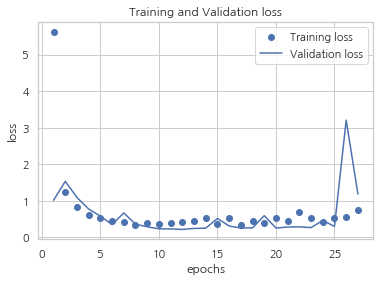

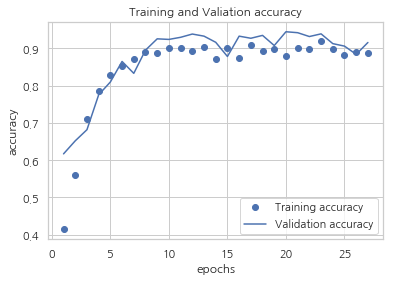

In [11]:
%matplotlib inline

# loss와 validation 결과 plot
train_acc = history2.history["acc"]
train_loss = history2.history["loss"]
val_acc = history2.history["val_acc"]
val_loss = history2.history["val_loss"]

epochs = list(range(1, len(train_acc) + 1))

plt.title("Training and Validation loss")
plt.plot(epochs, train_loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.figure()

plt.title("Training and Valiation accuracy")
plt.plot(epochs, train_acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()



In [41]:
test = os.listdir("./new_plant_disease_dataset/_test")
test_image_list = []
for i in test:
    test_image_list.append("./new_plant_disease_dataset/_test/" + i)
print(test_image_list, "\n")

test_image = Image.open(test_image_list[5])
print(test_image_list[5], "\n")

test_image = test_image.resize((128, 128))
print(test_image, "\n")
test_image_np_array = np.array(test_image)
test_image_np_array = test_image_np_array.reshape(1, 128, 128, 3)
print(test_image_np_array, "\n")

print(test_image_np_array.shape)

['./new_plant_disease_dataset/_test/AppleCedarRust1.JPG', './new_plant_disease_dataset/_test/AppleCedarRust2.JPG', './new_plant_disease_dataset/_test/AppleCedarRust3.JPG', './new_plant_disease_dataset/_test/AppleCedarRust4.JPG', './new_plant_disease_dataset/_test/AppleScab1.JPG', './new_plant_disease_dataset/_test/AppleScab2.JPG', './new_plant_disease_dataset/_test/AppleScab3.JPG'] 

./new_plant_disease_dataset/_test/AppleScab2.JPG 

<PIL.Image.Image image mode=RGB size=128x128 at 0x23F63E18048> 

[[[[123 136 168]
   [122 135 167]
   [121 134 166]
   ...
   [117 132 173]
   [121 136 177]
   [120 135 176]]

  [[122 135 167]
   [122 135 167]
   [122 135 167]
   ...
   [118 133 174]
   [119 134 175]
   [114 129 170]]

  [[121 134 166]
   [122 135 167]
   [122 135 167]
   ...
   [116 131 172]
   [118 133 174]
   [115 130 171]]

  ...

  [[105 120 161]
   [106 121 162]
   [103 118 159]
   ...
   [ 55  51  84]
   [ 54  50  83]
   [ 54  50  83]]

  [[106 121 162]
   [107 122 163]
   [104 119 

In [42]:
model2 = load_model('cnn_for_website.h5')
result = model2.predict(test_image_np_array)
result = result.tolist()
result = result[0]
print(result)

[1.7528661189203376e-08, 1.281738610309394e-17, 8.149962421301216e-18, 1.0]


In [43]:
if result.index(max(result)) == 0:
    result = "apple scab"
elif result.index(max(result)) == 1:
    result = "black rot"
elif result.index(max(result)) == 2:
    result = "cedar apple rust"
else:
    result = "healthy"
    
print(result)


healthy
